# Assignment 5: Geographic Data Analysis

In this assignment, you will be using a database of geographic data provided for you in the PySal library to create two plots, a choropleth map and a proportional symbol map. In addition to these two plots, you will compute the value of Moran's I for this data.

### Dataset

The dataset to be used in this assignment is a dataset containing Per Capita incomes for the United States' lower 48 states. In addition to the state-by-state data, the dataset contains shape files for each state that you can use
to create the choropleth and proportional symbol maps.

In [1]:
import geopandas as gpd
import pysal as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/abhay/anaconda2/lib/python2.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


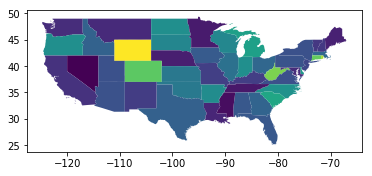

In [2]:
# Graded Part
# PartID: 5_1
# Part 1: Using the PySal Data, create a choropleth path of the United States
# that depicts the per capita income of each US state in 2009.
# Notes: The PySal and GeoPandas libraries both contain utility functions that
# may make this task easier.
per_cap_data = ps.open(ps.examples.get_path("usjoin.csv"))
us_df = gpd.read_file(ps.examples.get_path("us48.shp"))
us_df['per_cap'] = np.array(per_cap_data.by_col("2009"))
us_df.plot(column = "per_cap")
plt.show()

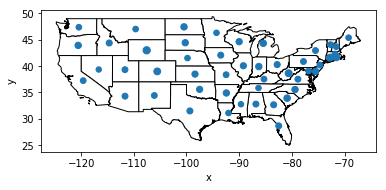

In [3]:
# Graded Part
# PartID: 5_2
# Part 2: Again using the PySal Data, create a proportional symbol map showing 
# a dot at the centroid of each state that is scaled to the per capita income 
# of each US state in 2009.
# Notes: The demonstration notebook for this unit contains code that performs 
# a similar task and may be a useful reference for your assignment.
us_df['centroid_column'] = us_df.centroid
centroids = list(us_df['centroid_column'])
df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))], \
                   'x':[centroids[i].x for i in range(len(centroids))], \
                   'data':list(us_df['per_cap'])})
base = us_df.plot(color='white', edgecolor='black')
df.plot( kind='scatter', x='x', y='y', s=df['data']*0.001, ax=base)
plt.show()

In [4]:
# Graded Part
# PartID: 5_3
# Part 3: Using the same data, compute the value of Moran's I for the per 
# capita income of each US state in 2009 using Rook Continuity. Report the 
# value of I rounded to 4 decimal places (i.e. x.XXXX)
# Notes: Again, the PySal and GeoPandas libraries may contain useful utility
# functions.
y = us_df['per_cap']
w = ps.open(ps.examples.get_path("states48.gal")).read()
mi = ps.Moran(y, w, two_tailed=False)
print (round(mi.I, 4))

0.4288
